In [23]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:

df=pd.read_csv('car.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [25]:
#For the rest of the homework, you'll need to use only these columns:
#Make, Model, Year, Engine HP, Engine Cylinders, Transmission Type, Vehicle Style, highway MPG,city mpg, MSRP



df_c=df[[
    'Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP'
]]

In [26]:
df_c.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [27]:
# Select only the features from above and transform their names using the next line:
# data.columns = data.columns.str.replace(' ', '_').str.lower()

df_c.columns=df_c.columns.str.replace(' ','_').str.lower()
df_c.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [28]:
# Fill in the missing values of the selected features with 0.

df_c=df_c.fillna(0)
df_c.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [29]:
# Rename MSRP variable to price
df_c['price']=df_c['msrp']
df_c.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,34500


In [30]:
#What is the most frequent observation (mode) for the column transmission_type?
df_c['transmission_type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

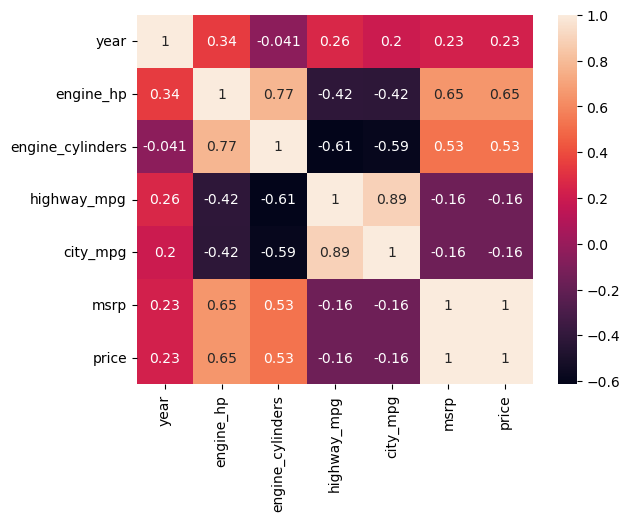

In [31]:
# Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
# What are the two features that have the biggest correlation in this dataset?
sns.heatmap(df_c.corr(numeric_only=True),annot=True);

In [32]:
# Now we need to turn the price variable from numeric into a binary format.
# Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

df_c['above_average']=(df_c['price']>df_c['price'].mean()).astype('int')
df_c.drop(columns=['price','msrp'],inplace=True)
df_c.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [33]:
# Split your data in train/val/test sets with 60%/20%/20% distribution.
# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
# Make sure that the target value (above_average) is not in your dataframe.

from sklearn.model_selection import train_test_split

df_full_train,df_test=train_test_split(df_c,test_size=0.2,random_state=42)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=42)

df_full_train=df_full_train.reset_index(drop=True)
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

print(len(df_full_train))
print(len(df_train))
print(len(df_val))
print(len(df_test))

9531
7148
2383
2383


In [34]:
y_full_train=df_full_train['above_average'].values
y_train=df_train['above_average'].values
y_val=df_val['above_average'].values
y_test=df_test['above_average'].values

del df_full_train['above_average']
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [35]:
# Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
# Round the scores to 2 decimals using round(score, 2).
# Which of these variables has the lowest mutual information score?

# make
# model
# transmission_type
# vehicle_style

from sklearn.metrics import mutual_info_score
mi=df_train[['make','model','transmission_type','vehicle_style']].apply(lambda x: round(mutual_info_score(x,y_train),2 ))
mi.sort_values(ascending=False)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

In [38]:
# Now let's train a logistic regression.
# Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
# Fit the model on the training dataset.
# To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
# model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
# Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
# What accuracy did you get?

In [36]:
from sklearn.feature_extraction import DictVectorizer
train_full_dict=df_full_train.to_dict(orient='records')
train_dict=df_train.to_dict(orient='records')
val_dict=df_val.to_dict(orient='records')
test_dict=df_test.to_dict(orient='records')

dv=DictVectorizer(sparse=False)
X_train_full=dv.fit_transform(train_full_dict)
X_train=dv.transform(train_dict)
X_val=dv.transform(val_dict)
X_test=dv.transform(test_dict)

print(X_train_full.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9531, 976)
(7148, 976)
(2383, 976)
(2383, 976)


In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [40]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_val)
print(round(accuracy_score(y_val,y_pred),2))

0.95


In [41]:
# For this question, we'll see how to use a linear regression model from Scikit-Learn.
# We'll need to use the original column price. Apply the logarithmic transformation to this column.
# Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
# This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
# Round your RMSE scores to 3 decimal digits.
# Which of these alphas leads to the best RMSE on the validation set?

In [ ]:
df_lr=df_c.copy()
df_lr['price']=df['MSRP']
df_lr.drop(columns='above_average',inplace=True)
df_lr.head()

In [ ]:
df_full_train_lr,df_test_lr=train_test_split(df_lr,test_size=0.2,random_state=42)
df_train_lr,df_val_lr=train_test_split(df_full_train_lr,test_size=0.25,random_state=42)


y_train_lr=np.log1p(df_train_lr.price.values)
y_val_lr= np.log1p(df_val_lr.price.values)
y_test_lr=np.log1p(df_test_lr.price.values)

del df_train_lr['price']
del df_val_lr['price']
del df_test_lr['price']

from sklearn.feature_extraction import DictVectorizer
train_full_lr_dict=df_full_train_lr.to_dict(orient='records')
train_dict_lr=df_train_lr.to_dict(orient='records')
val_dict_lr=df_val_lr.to_dict(orient='records')
test_dict_lr=df_test_lr.to_dict(orient='records')

dv=DictVectorizer(sparse=False)
X_train_full_lr=dv.fit_transform(train_full_lr_dict)
X_train_lr=dv.transform(train_dict_lr)
X_val_lr=dv.transform(val_dict_lr)
X_test_r=dv.transform(test_dict_lr)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:

for r in [0, 0.01, 0.1, 1, 10]:
    lr=Ridge(solver='sag',alpha=r,random_state=42)
    lr.fit(X_train_lr,y_train_lr)
    y_pred_lr=lr.predict(X_val_lr)
    print(r,round( mean_squared_error(y_val_lr,y_pred_lr),3))